## `INNOMATICS RESEARCH LABS Hackathon ------------------------------`

In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [466]:
data = pd.read_csv('data hackathon.csv')
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [467]:
data.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [468]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [469]:
data.dropna(axis = 0,how='any',inplace=True)  # delete row which contain null values

In [470]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [471]:
data.shape

(2219, 3)

In [472]:
data.skew()

x1     0.071848
x2    33.287853
y      0.233363
dtype: float64

In [473]:
data.kurt()

x1      -1.264961
x2    1107.106508
y       -1.947298
dtype: float64

### `univariate analysis`

### x1

<AxesSubplot:xlabel='x1', ylabel='Density'>

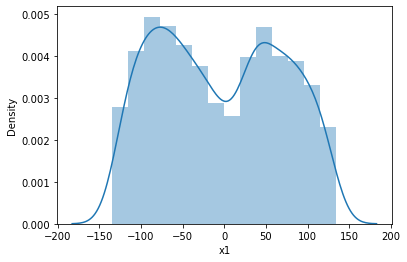

In [474]:
sns.distplot(data['x1'])

<AxesSubplot:xlabel='x1'>

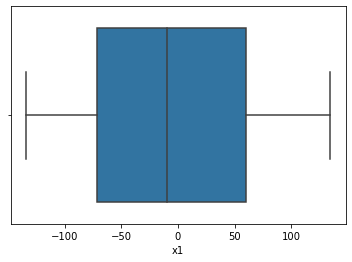

In [475]:
sns.boxplot(data['x1'])

In [476]:
data['x1'].describe()

count    2219.000000
mean       -4.771837
std        74.938264
min      -134.369160
25%       -71.581453
50%        -9.750840
75%        59.963056
max       134.508687
Name: x1, dtype: float64

In [477]:
data['x1'].skew()

0.07184836241273518

### x2

<AxesSubplot:xlabel='x2', ylabel='Density'>

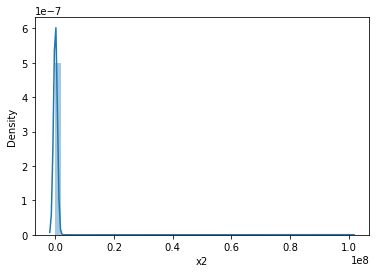

In [478]:
sns.distplot(data['x2'])

<AxesSubplot:xlabel='x2'>

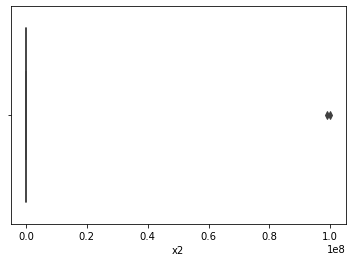

In [479]:
sns.boxplot(data['x2'])

In [480]:
data['x2'].describe()

count    2.219000e+03
mean     8.967782e+04
std      2.986680e+06
min     -1.348761e+02
25%     -8.025966e+01
50%     -1.566092e+00
75%      6.390448e+01
max      1.000000e+08
Name: x2, dtype: float64

In [481]:
data['x2'].skew()

33.28785250526122

### y

In [482]:
data['y'].value_counts()

0    1238
1     981
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

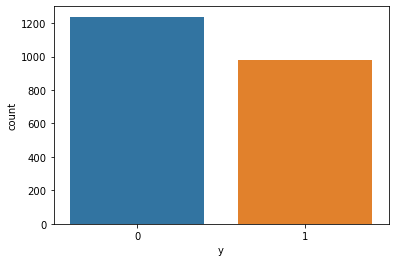

In [483]:
sns.countplot(data['y'])

### `Bivariate analysis`

In [484]:
cont_columns = ['x1','x2']

In [485]:
from scipy.stats import ttest_ind

for i in cont_columns:
    target_yes = data.loc[data['y']==1,i]
    target_no = data.loc[data['y']==0,i]
    ttest_results = ttest_ind(target_yes,target_no)
    print(f'{i} vs y => {ttest_results}')

x1 vs y => Ttest_indResult(statistic=-5.7332307226646675, pvalue=1.1198092675879041e-08)
x2 vs y => Ttest_indResult(statistic=-1.259249084655836, pvalue=0.2080729399714693)


### `x2 is not related according to t-test , drop it ------------------------`

In [486]:
from sklearn.preprocessing import minmax_scale
data[['x1']] = minmax_scale(data[['x1']])

In [487]:
X = data.x1.values.reshape(-1,1)
y = data['y']

In [488]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

## `Logistic Regression ---------------`

In [489]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [490]:
y_pred = model.predict(X_test)

In [491]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[196  45]
 [150  53]]
Accuracy => 0.5608108108108109
Precision => 0.5408163265306123
Recall => 0.26108374384236455
f1-score => 0.3521594684385382


<br />
<br />
<br />
<br />

---------

## `Decision Tree ---------------------`

In [492]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [493]:
y_pred = tree.predict(X_test)

In [494]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[183  58]
 [137  66]]
Accuracy => 0.5608108108108109
Precision => 0.532258064516129
Recall => 0.3251231527093596
f1-score => 0.40366972477064217


#### `Grid Search --------------------------------------------------`

In [495]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[2,4,5,6,7,8,14,15]
}

tree = DecisionTreeClassifier()

In [496]:
tree_grid = GridSearchCV(tree,param_grid,n_jobs=-1,scoring='precision')

In [497]:
tree_grid.fit(X_train,y_train.astype(int))

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 5, 6, 7, 8, 14, 15]},
             scoring='precision')

In [498]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [499]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree = DecisionTreeClassifier(criterion='gini',max_depth=2)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [500]:
y_pred = tree.predict(X_test)

In [501]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[178  63]
 [135  68]]
Accuracy => 0.5540540540540541
Precision => 0.5190839694656488
Recall => 0.33497536945812806
f1-score => 0.4071856287425149


<br />
<br />
<br />
<br />

---------



## `KNN -------------------------------`

In [502]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)

In [503]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[147  94]
 [114  89]]
Accuracy => 0.5315315315315315
Precision => 0.48633879781420764
Recall => 0.43842364532019706
f1-score => 0.46113989637305697


#### `Grid Search --------------------------------------`

In [504]:
parameters = {
    "n_neighbors": list(range(3,17,2)),
    "p":[1,2]
}

In [505]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid = GridSearchCV(knn,parameters,n_jobs=-1,scoring="precision")
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2]},
             scoring='precision')

In [506]:
grid.best_params_

{'n_neighbors': 13, 'p': 1}

In [507]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13,p=1)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)

In [508]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[160  81]
 [134  69]]
Accuracy => 0.5157657657657657
Precision => 0.46
Recall => 0.3399014778325123
f1-score => 0.3909348441926346


<br />
<br />
<br />
<br />

---------

## `SVM with Linear Kernel => SVC -------------------------------`

In [509]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [510]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[241   0]
 [203   0]]
Accuracy => 0.5427927927927928
Precision => 0.0
Recall => 0.0
f1-score => 0.0


#### `Grid Search -------------------------------------------------`

In [511]:
parameters = {
    "gamma": ['scale','auto'],
    "C":[1.0,2.0]
}

In [512]:
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel='linear')
grid = GridSearchCV(svc,parameters,n_jobs=-1,scoring="accuracy")
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [1.0, 2.0], 'gamma': ['scale', 'auto']},
             scoring='accuracy')

In [513]:
y_pred = grid.predict(X_test)

In [514]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[241   0]
 [203   0]]
Accuracy => 0.5427927927927928
Precision => 0.0
Recall => 0.0
f1-score => 0.0


<br />
<br />
<br />
<br />

---------

## `SVM with RBF Kernel => SVC -------------------------------`

In [515]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [516]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[193  48]
 [142  61]]
Accuracy => 0.5720720720720721
Precision => 0.5596330275229358
Recall => 0.30049261083743845
f1-score => 0.3910256410256411


#### `Grid Search`

In [517]:
parameters = {
    "gamma": ['scale','auto'],
    "C":[1.0,2.0]
}

In [518]:
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc,parameters,n_jobs=-1,scoring="accuracy")
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.0, 2.0], 'gamma': ['scale', 'auto']},
             scoring='accuracy')

In [519]:
y_pred = grid.predict(X_test)

In [520]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[193  48]
 [142  61]]
Accuracy => 0.5720720720720721
Precision => 0.5596330275229358
Recall => 0.30049261083743845
f1-score => 0.3910256410256411


<br />
<br />
<br />
<br />
<br />

--------------

## `Observations ----------------------------------------------`
##### Here in this hackathon I have tested 5 models :
    Logistic Regression
    Decision Tree
    KNN
    SVM with Linear Kernel
    SVM with RBF Kernel
    
    
##### Below are their accuracies and best parameters :
    Logistic Regression
        Accuracy => 0.5608108108108109
        Precision => 0.5408163265306123
        Recall => 0.26108374384236455
        f1-score => 0.3521594684385382
    Decision Tree
        Accuracy => 0.5608108108108109
        Precision => 0.532258064516129
        Recall => 0.3251231527093596
        f1-score => 0.40366972477064217
    KNN
        Accuracy => 0.5315315315315315
        Precision => 0.48633879781420764
        Recall => 0.43842364532019706
        f1-score => 0.46113989637305697
    SVM with Linear Kernel
        Accuracy => 0.5427927927927928
        Precision => 0.0
        Recall => 0.0
        f1-score => 0.0
    SVM with RBF Kernel
        Accuracy => 0.5720720720720721
        Precision => 0.5596330275229358
        Recall => 0.30049261083743845
        f1-score => 0.3910256410256411
        
#### Through modelling of all 5 models I get the outcome that:
`SVM with RBF Kernel has given the highest accuracy`